<a href="https://colab.research.google.com/github/Raj9211420/YBI-FOUNDATION-PROJECTS/blob/main/Copy_of_AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN for Regression

In [ ]:
# Step 1: Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Dataset and Define y and X
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/refs/heads/main/Admission%20Chance.csv')

In [ ]:
# Step 3: Define y and X
df.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
y = df[['Chance of Admit ']]
X = df[['GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research']]

In [ ]:
# Step 4: Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [ ]:
# Step 5: Creating ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
X.shape[1]

7

In [ ]:
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer = 'adam',loss= 'mae', metrics=['mae'])

In [ ]:
# Step 6: Train
model.fit(X_train,y_train)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7369 - mae: 0.7369


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 7: Predict
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
# Step 8: Evaluate
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.9848155975341797

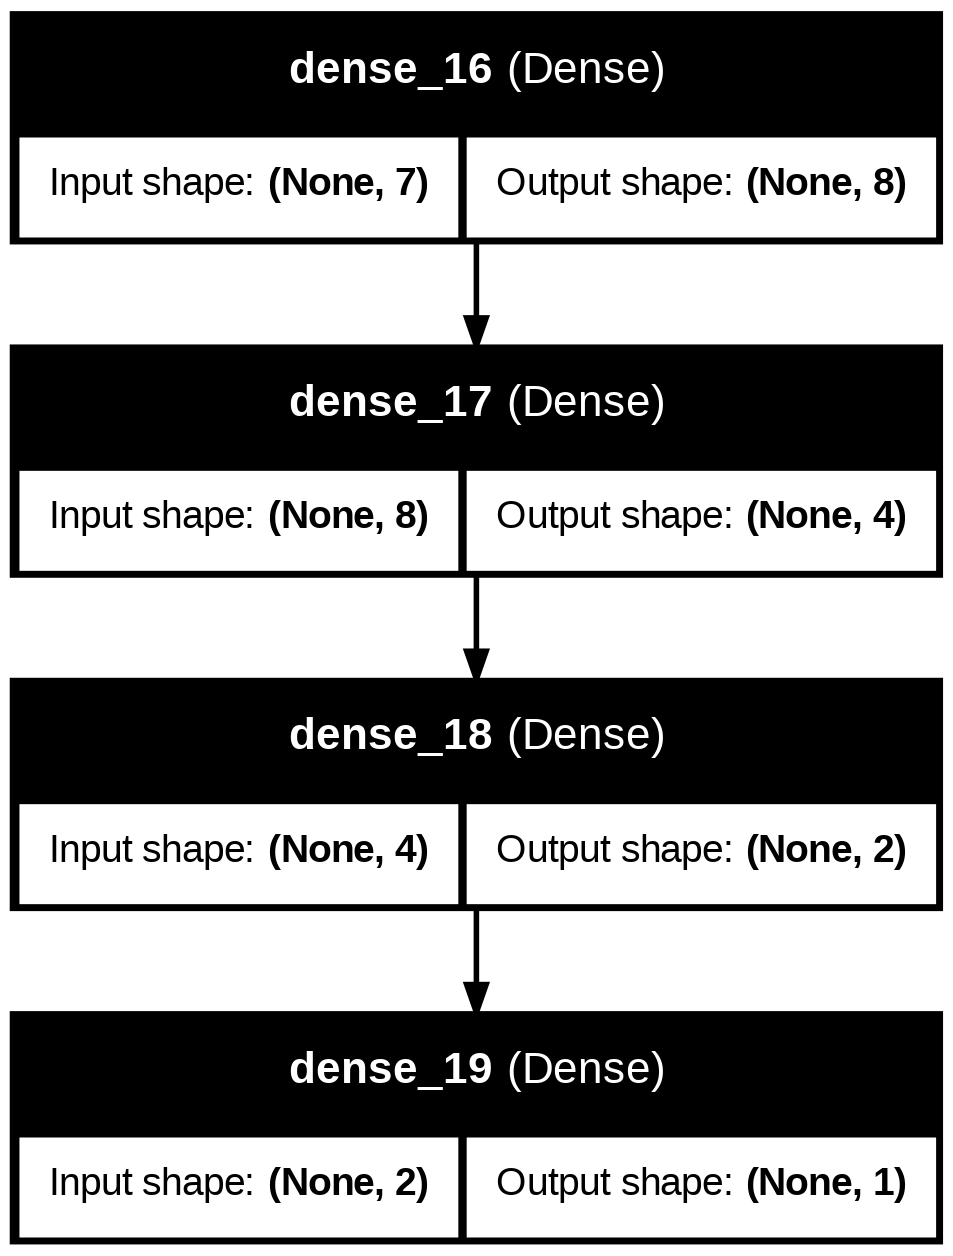

In [ ]:
from keras.utils import plot_model

# Plot the model architecture and save it to file
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
